In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab1.ipynb")

![](img/571_lab_banner.png)

# Lab 1: Decision trees and machine learning fundamentals

<br><br>

## Imports

In [2]:
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert-warning">
    
## Instructions  
rubric={mechanics}

You will earn points for following these instructions and successfully submitting your work on Gradescope.  

### Before you start  

- Read the **[Use of Generative AI Policy](https://ubc-mds.github.io/policies/)**.
  
- Review the **[General Lab Instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/)**.
    
- Check the **[MDS Rubrics](https://github.com/UBC-MDS/public/tree/master/rubric)** for grading criteria.

### Before submitting  

- **Run all cells** (▶▶ button) to ensure the notebook executes cleanly from top to bottom.

  - Execution counts must start at **1** and be sequential.
    
  - Notebooks with missing outputs or errors may lose marks.
    
- **Include a clickable link to your GitHub repository** below this cell.

- Make at least 3 commits to your GitHub repository and ensure it's up to date. If Gradescope becomes inaccessible, we'll grade the most recent GitHub version submitted before the deadline.

- **Do not upload or push data files** used in this lab to GitHub or Gradescope. (A `.gitignore` is provided to prevent this.)  



### Submitting on Gradescope  

- Upload **only** your `.ipynb` file (with outputs shown) and any required output files. Do **not** submit extra files.
  
- If needed, refer to the [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/).  
- If your notebook is too large to render, also upload a **Web PDF** or **HTML** version.  
  - You can create one using **File $\rightarrow$ Save and Export Notebook As**.  
  - If you get an error when creating a PDF, try running the following commands in your lab directory:  

    ```bash
    conda install -c conda-forge nbconvert-playwright
    jupyter nbconvert --to webpdf lab1.ipynb
    ```  

  - Ensure all outputs are visible in your PDF or HTML file; TAs cannot grade your work if outputs are missing.

</div>


_Points:_ 4

YOUR REPO LINK GOES HERE

<!-- END QUESTION -->

<br><br>

<div class="alert alert-info">
    
## Warmup with toy dataset 

</div>

<div class="alert alert-info">

### Warmup activity

What's your studying or working style?

Below is a simple decision tree model trained to **predict what type of student you are based on your studying style**.

Follow the branches and see where you end up. Does this model predict you correctly?

#### Features

* **Daily stress level:** How tense or relaxed you usually feel (scale 1–10).

* **Daily social media time:** How many hours you spend scrolling or chatting online.

* **Sleep hours the night before a deadline:** How many hours do you typically sleep the night before an assignment, quiz, or project is due?

#### Predicted student types

* **Planner:** Organized, consistent, planns everything ahead of time.
  
* **Procrastinator:** Starts late and scrambles to finish.
* **Chill:** Chill, low stress, enjoys life, has steady routines.
* **Last minute genius:** Works best under pressure, bursts of inspiration right before the deadline.



</div>

![](img/lab1_e1.png)

Attrbutions: Image created by ChatGPT 5.0

<div class="alert alert-info">

Let's review the terminologies in machine learning together! (You are **NOT** graded on this warm-up task)

**Your Task:**

Please fill in each of the following sentences using the provided machine learning terminologies from the list below. Keep in mind that each term should be used only once!

**List of Terms (in no particular order):**

    a) hyperparameters
    b) training
    c) tree depth
    d) parameters
    e) example/data point
    f) features
    g) target
    h) root node
    i) branch
    j) leaf node


1. The type of student we are trying to predict — chill, planner, last-minute genius, or procrastinator — represents the variable we aim to predict or explain. It is called the (g).

2. The measurable inputs such as stress level, social media time, and sleep hours are known as (f).

3. Each individual row in the dataset, containing both the input values (features) and the corresponding output (target), is referred to as an (e).

4. In the decision tree above, the very first question ("Daily stress level < 7?") is the starting point of the model. It is called the (h).

5. The number of levels or layers from the initial question down to the final prediction in a decision tree is known as the (c).

6. Before building the decision tree, we specify certain configuration settings such as the maximum tree depth. These controllable settings are called (a).


</div>

<br><br>

## Exercise 1: Decision trees with a toy dataset 
<hr>

Suppose you have three different job offers with comparable salaries and job descriptions. You want to decide which one to accept, and you want to make this decision based on which job is likely to make you happy. Being a very systematic person, you come up with three features associated with the offers, which are important for your happiness: whether the colleagues are supportive, whether there is work-hour flexibility, and whether the company is a start-up or not. So the `X` of your offer data looks as follows: 

In [3]:
offer_data = {
    # Features
    "supportive_colleagues": [1, 0, 0, 1],
    "work_hour_flexibility": [0, 0, 1, 1],
    "start_up": [0, 1, 1, 1],    
}

offer_df = pd.DataFrame(offer_data)
offer_df

,supportive_colleagues,work_hour_flexibility,start_up
0,1,0,0
1,0,0,1
2,0,1,1
3,1,1,1


Your goal is to get predictions for these rows. In other words, for each row, you want to predict whether that job would make you **happy** or **unhappy**.   

So you ask the following questions to some of your friends (who you think have similar notions of happiness) regarding their jobs:

1. Do you have supportive colleagues? (1 for 'yes' and 0 for 'no')
2. Do you have flexible work hours? (1 for 'yes' and 0 for 'no')
3. Do you work for a start-up? (1 for 'start up' and 0 for 'non start up')
4. Are you happy in your job? (happy or unhappy)

Suppose you get the following data from this toy survey. You decide to train a machine learning model using this toy survey data and use this model to predict which job from `offer_df` is likely to make you happy. 

In [4]:
import pandas as pd

happiness_data = {
    # Features
    "supportive_colleagues": [1, 1, 1, 0, 0, 1, 1, 0, 1, 0],
    "work_hour_flexibility": [1, 1, 0, 1, 1, 0, 1, 0, 0, 0],
    "start_up": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
    # Target
    "target": [
        "happy",
        "happy",
        "happy",
        "unhappy",
        "unhappy",
        "happy",
        "happy",
        "unhappy",
        "unhappy",
        "unhappy",
    ],
}

train_df = pd.DataFrame(happiness_data)
train_df

,supportive_colleagues,work_hour_flexibility,start_up,target
0,1,1,1,happy
1,1,1,0,happy
2,1,0,1,happy
3,0,1,0,unhappy
4,0,1,1,unhappy
5,1,0,0,happy
6,1,1,0,happy
7,0,0,1,unhappy
8,1,0,1,unhappy
9,0,0,0,unhappy


<br><br>

<div class="alert alert-info">
    
### 1.1 Decision stump by hand 
rubric={autograde}

**Your tasks:**

Using this toy dataset, manually build a decision stump (a decision tree with only one split) based on the condition:

```
supportive_colleagues <= 0.5
```

1. What training accuracy would you obtain with this decision stump?
2. Save the accuracy (as a decimal) in an object named `supportive_colleagues_acc`.

> Note: You are expected to do this question by hand with a pen and paper. You do not need to show any calculations or code.
</div>

<div class="alert alert-warning">

Solution_1.1
    
</div>

_Points:_ 2

supportive_colleagues <= 0.5 (i.e = 0)  --> there are 4 predictions for these and all of them have target 'unhappy' since we take the majority class we take this 4.

supportive_colleagues > 0.5 (i.e = 1)  --> there are 6 predictions of these. 5 predictions are 'happy' while 1 is 'unhappy'. We take the majority, so we take 5.

This gives the number of correct prediction = 4+5=9
Total predictions = 10

Acc = number of correct predictions/total predictions = 9/10 = 0.9

In [5]:
supportive_colleagues_acc = 0.9

In [6]:
grader.check("q1.1")

q1.1 results: All test cases passed!

<br><br>

<div class="alert alert-info">
    
### 1.2 Separating features and target
rubric={autograde}

Recall that in `scikit-learn`, before building a classifier, we need to separate features and target. 

**Your tasks:**

1. Separate features and target from `train_df` and save them in `X_train_toy` and `y_train_toy`, respectively.

</div>

<div class="alert alert-warning">

Solution_1.2
    
</div>

_Points:_ 1

In [7]:
X_train_toy = train_df.drop(columns=['target'])
y_train_toy = train_df['target']

train_df
X_train_toy
y_train_toy

0      happy
1      happy
2      happy
3    unhappy
4    unhappy
5      happy
6      happy
7    unhappy
8    unhappy
9    unhappy
Name: target, dtype: object

In [8]:
grader.check("q1.2")

q1.2 results: All test cases passed!

<br><br>

<div class="alert alert-info">
    
### 1.3 Create a decision tree classifier object
rubric={autograde}

**Your tasks:**

1. Create a `DecisionTreeClassifier` object with `random_state=16` and store it in a variable called `toy_tree`.

</div>

<div class="alert alert-warning">

Solution_1.3
    
</div>

_Points:_ 1

In [9]:
from sklearn.tree import DecisionTreeClassifier
toy_tree = DecisionTreeClassifier(random_state=16)
toy_tree

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,16
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [10]:
grader.check("q1.3")

q1.3 results: All test cases passed!

<br><br>

<div class="alert alert-info">
    
### 1.4 `fit` the decision tree classifier 
rubric={autograde}

**Your tasks:**

1. Now train a decision tree model by calling `fit` on `toy_tree` with `X_train_toy` and `y_train_toy` created above.

</div>

<div class="alert alert-warning">

Solution_1.4
    
</div>

_Points:_ 1

In [11]:
toy_tree.fit(X_train_toy, y_train_toy)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,16
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [12]:
grader.check("q1.4")

q1.4 results: All test cases passed!

<br><br>

<div class="alert alert-info">
    
### 1.5 Visualize the trained decision tree
rubric={autograde}


**Your tasks:**
- Visualize the trained decision tree model using the [`tree.plot_tree`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) method in `sklearn` by passing the appropriate values for the following arguments: 
    - `feature_names`
    - `class_names`
  
Save the names of the features in `feature_names` variable, names of the classes in `class_names` variable and the visualization tree returned by the function in a variable called `toy_tree_viz`.

</div>

<div class="alert alert-warning">

Solution_1.5
    
</div>

_Points:_ 2

In [13]:
feature_names = X_train_toy.columns.tolist()
feature_names

['supportive_colleagues', 'work_hour_flexibility', 'start_up']

In [14]:
class_names = toy_tree.classes_.tolist()
class_names

['happy', 'unhappy']

[Text(0.3333333333333333, 0.875, 'supportive_colleagues <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]\nclass = happy'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = unhappy'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'start_up <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = happy'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = happy'),
 Text(0.6666666666666666, 0.375, 'work_hour_flexibility <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = happy'),
 Text(0.5, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = happy'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = happy')]

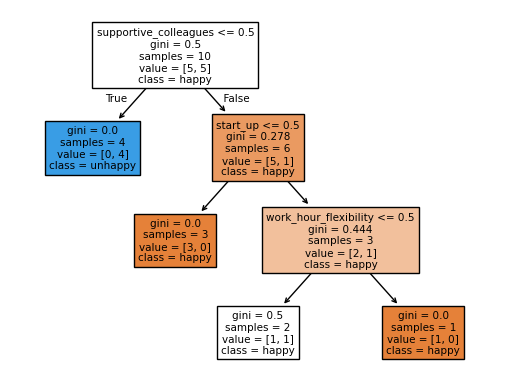

In [15]:
from sklearn import tree

feature_names = X_train_toy.columns.tolist() # feature names 
class_names = toy_tree.classes_.tolist() # unique class names
toy_tree_viz = tree.plot_tree(toy_tree, feature_names=feature_names, 
                             class_names=class_names, filled=True)
toy_tree_viz

In [16]:
grader.check("q1.5")

q1.5 results: All test cases passed!

<br><br>

You should see that the tree has a depth of 3. We can also access this value directly using the `get_depth()` function of the tree object:

In [17]:
toy_tree.get_depth()

3

<br><br>

<div class="alert alert-info">
    
### 1.6 Accuracy calculation
rubric={autograde}

**Your tasks:**

1. Evaluate the `toy_tree` on the training data (i.e., call `score()` on `X_train_toy` and `y_train_toy`) and store the score in a variable called `train_acc`.

</div>

<div class="alert alert-warning">

Solution_1.6
    
</div>

_Points:_ 1

In [18]:
train_acc = toy_tree.score(X_train_toy, y_train_toy)
train_acc

0.9

In [19]:
grader.check("q1.6")

q1.6 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 1.7 Discussion
rubric={reasoning}

**Your tasks:**

1. Do you achieve perfect training accuracy? If so, what are the reasons behind this, and if not, what factors contribute to the imperfection?

</div>

<div class="alert alert-warning">

Solution_1.7
    
</div>

_Points:_ 2

_No, the training accuracy was 0.9 not 1. This could be becuase DecisionTreeClassier() also uses majority class and therefore the minority are sacrifised. Could also be that we only used max_depth of 3, if we increase it, it may result to perfect score._

<!-- END QUESTION -->

<br><br>

<div class="alert alert-info">
    
### 1.8 Predicting on the offer data 
rubric={autograde}

**Your tasks:**

1. Using the trained decision tree above, predict the targets for all examples in `offer_df` and store them as a list in the `predictions` variable below.
2. In which jobs you are likely to be happy? Append the index or indices of all the examples where you are likely to be happy to the `happy_job_indices` list below.

</div>

In [20]:
offer_df

,supportive_colleagues,work_hour_flexibility,start_up
0,1,0,0
1,0,0,1
2,0,1,1
3,1,1,1


<div class="alert alert-warning">

Solution_1.8
    
</div>

_Points:_ 3

In [21]:
predictions = toy_tree.predict(offer_df).tolist()
happy_job_indices = [
    i for i, pred in enumerate(predictions) if pred == 'happy'
]

happy_job_indices

[0, 3]

In [22]:
grader.check("q1.8")

q1.8 results: All test cases passed!

<div class="alert alert-warning">
⚠️ Don't forget to <code>git commit</code>. Regular commits will help you track your progress!  
</div>

<br><br><br><br>

<div class="alert alert-info">
    
## Decision trees on Spotify Song Attributes dataset 

</div>

## Exercise 2: Data and Exploratory Data Analysis (EDA)

For the rest of the lab you'll be using Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/home) dataset. The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/get-audio-features). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it under the `data` directory.

> You will not be able to push it to your repository (hopefully) because I have seeded the repository with `.gitignore`. 

<div class="alert alert-info">
    

### 2.1 Reading the data CSV
rubric={autograde}
 
**Your tasks:**
1. Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column of the .csv file should be set as the index.

> Make sure you have put the data CSV as `spotify.csv` under the data directory (data/spotify.csv). When you read the data file, use this relative path for the autograder to work properly on Gradescope.

</div>

<div class="alert alert-warning">

Solution_2.1
    
</div>

_Points:_ 2

In [23]:
spotify_df = pd.read_csv("data/spotify.csv", index_col=0)
spotify_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [24]:
grader.check("q2.1")

q2.1 results: All test cases passed!

<br><br>

<div class="alert alert-info">
    

### 2.2 Data splitting 
rubric={autograde

**Your tasks:**

1. Split the dataframe into `train_df` and `test_df` with `random_state=123` and `test_size=0.2`. 

</div>

<div class="alert alert-warning">

Solution_2.2
    
</div>

_Points:_ 2

In [25]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(
    spotify_df, test_size=0.2, random_state=123
)
train_df
test_df 


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
1423,0.00184,0.541,225427,0.609,0.000000,1,0.1790,-3.715,1,0.1270,158.314,4.0,0.298,0,She On My Dick,Rick Ross
356,0.00855,0.293,202160,0.792,0.011100,7,0.1330,-3.747,1,0.0363,161.933,4.0,0.696,1,Grinder,Gary Clark Jr.
854,0.93400,0.440,254360,0.433,0.811000,2,0.2730,-17.453,0,0.0412,79.952,4.0,0.217,1,Episode I - Duel of The Fates,John Williams
1445,0.09870,0.443,210884,0.727,0.000009,0,0.1180,-5.171,0,0.0984,74.827,4.0,0.423,0,Freesol (feat. Skyler Stonestreet),Seven Lions
1647,0.00346,0.723,176561,0.809,0.001230,7,0.5650,-3.081,0,0.0625,98.007,4.0,0.271,0,Lean On (feat. MØ & DJ Snake),Major Lazer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,0.00212,0.777,500550,0.739,0.868000,9,0.1090,-9.089,1,0.0390,119.992,4.0,0.201,1,Acamar,Frankey
883,0.19800,0.890,326318,0.520,0.273000,2,0.0638,-6.927,0,0.1870,114.959,4.0,0.717,1,Something About You - Extended Mix,Hayden James
853,0.27100,0.567,336800,0.851,0.000000,1,0.5690,-5.897,1,0.4840,80.935,4.0,0.598,1,"A Day In The Life - feat. RZA, The Mars Volta ...",Handsome Boy Modeling School
903,0.02450,0.803,316373,0.427,0.405000,8,0.0953,-10.819,1,0.0509,118.008,4.0,0.451,1,Dorothy,Polo & Pan


In [26]:
grader.check("q2.2")

q2.2 results: All test cases passed!

<br><br>

<div class="alert alert-info">
    
### 2.3 Number of training and test examples
rubric={autograde}

**Your tasks:**
1. How many training and test examples do we have? Store them as integers in the variables below.

</div>

<div class="alert alert-warning">

Solution_2.3
    
</div>

_Points:_ 1

In [27]:
# Please provide integer values
n_train_samples = train_df.shape
n_test_samples = test_df.shape

n_train_samples = len(train_df)
n_test_samples = len(test_df)

n_train_samples
n_test_samples

404

In [28]:
grader.check("q2.3")

q2.3 results: All test cases passed!

<br><br>

Typically, when developing machine learning pipelines, a large portion of the work goes into exploratory data analysis (EDA). This step helps you understand both your data and your prediction task before modeling. In this lab, due to time constraints, we'll only examine the output of a few basic methods. Let's begin with the `info` and `describe` methods of a pandas DataFrame.

In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1613 entries, 1505 to 1534
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      1613 non-null   float64
 1   danceability      1613 non-null   float64
 2   duration_ms       1613 non-null   int64  
 3   energy            1613 non-null   float64
 4   instrumentalness  1613 non-null   float64
 5   key               1613 non-null   int64  
 6   liveness          1613 non-null   float64
 7   loudness          1613 non-null   float64
 8   mode              1613 non-null   int64  
 9   speechiness       1613 non-null   float64
 10  tempo             1613 non-null   float64
 11  time_signature    1613 non-null   float64
 12  valence           1613 non-null   float64
 13  target            1613 non-null   int64  
 14  song_title        1613 non-null   object 
 15  artist            1613 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory u

We can see that there are no missing values. Most features are numeric (`float64` or `int64`), with two object-type columns (`song_title` and `artist`).

<br><br>

The `describe` method provides quick summary statistics of the training data. By default, it summarizes numeric columns and returns a DataFrame.

In [30]:
spotify_summary = train_df.describe()
spotify_summary

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000
mean,0.185627,0.616745,247114.827650,0.681296,0.136862,5.383137,0.189189,-7.112929,0.621203,0.091277,121.979777,3.964662,0.497587,0.507750
std,0.259324,0.163225,81177.300308,0.211612,0.277744,3.620422,0.153170,3.838867,0.485238,0.087890,26.965641,0.255201,0.247378,0.500095
min,0.000005,0.122000,16042.000000,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.035900,0.000000
25%,0.009190,0.511000,200105.000000,0.564000,0.000000,2.000000,0.092300,-8.388000,0.000000,0.037300,100.518000,4.000000,0.295000,0.000000
50%,0.062500,0.629000,230200.000000,0.714000,0.000071,6.000000,0.127000,-6.248000,1.000000,0.054900,121.990000,4.000000,0.496000,1.000000
75%,0.251000,0.738000,272533.000000,0.844000,0.057300,9.000000,0.243000,-4.791000,1.000000,0.107000,137.932000,4.000000,0.690000,1.000000
max,0.995000,0.984000,849960.000000,0.997000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


From the summary, notice a few key points:

- The dataset has good variety in features like tempo, loudness, energy, and valence (mood).

- Most songs aren't very acoustic or instrumental (both are heavily skewed toward 0).

- Danceability and energy are fairly high overall.

- Valence (mood) spans the full range, and the target variable is roughly balanced between 0 and 1.

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 2.4 Plotting histograms 
rubric={viz}

The starter code below produces histograms for the `loudness` feature using pandas plotting. The histograms show the distribution of the feature values in the training set, separated for positive (target=1, i.e., user liked the song) and negative (target=0, i.e., user disliked the song) examples. There are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

> Note: I am using `matplotlib` and pandas plotting here. This is a manually graded question and you can use altair instead, as you're learning it in DSCI 531. I've added `altair` in the course environment and it'll also work fine on Gradescope.

</div>

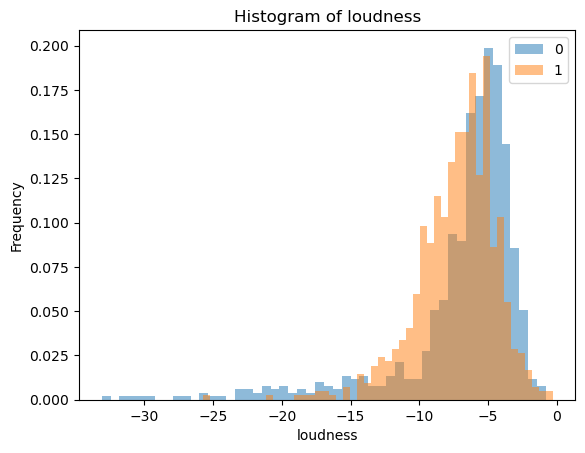

In [31]:
feat = "loudness"
train_df.groupby("target")[feat].plot.hist(bins=50, alpha=0.5, legend=True, density = True, title = "Histogram of " + feat);
plt.xlabel(feat);

**Your tasks:**

Create histograms for the following features in the order below.
- acousticness
- danceability
- tempo
- energy
- valence

> To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of your loop, which draws the figure and resets the canvas for your next plot.

<div class="alert alert-warning">

Solution_2.4
    
</div>

_Points:_ 3

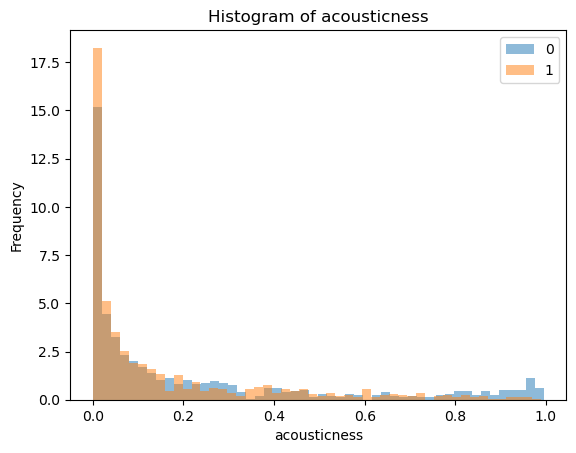

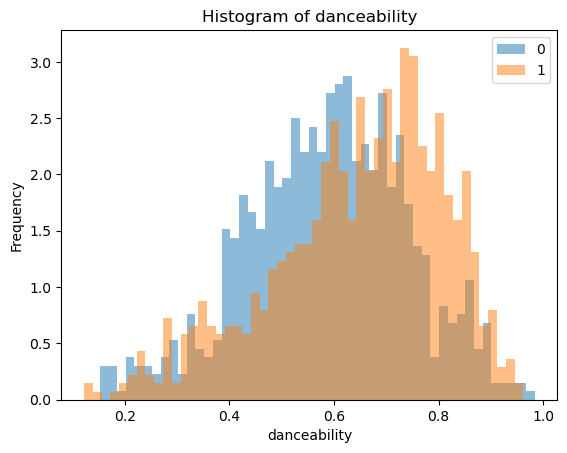

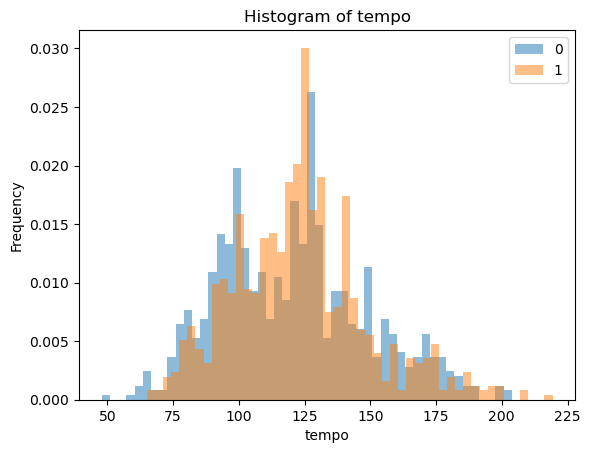

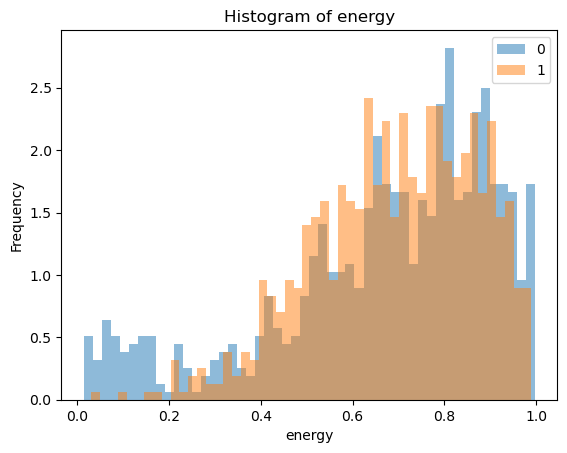

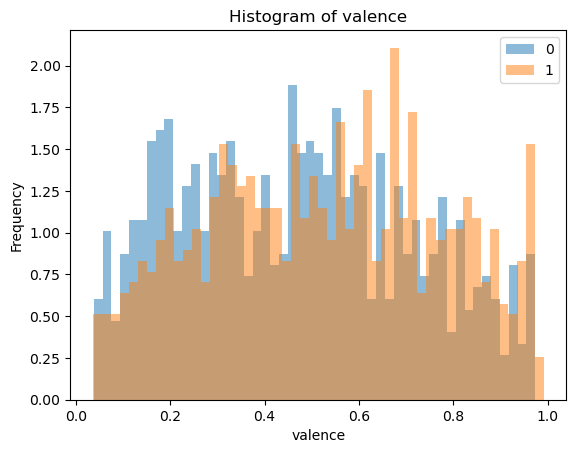

In [32]:
features = [
    "acousticness",
    "danceability",
    "tempo",
    "energy",
    "valence"
]

for feature in features:
    train_df.groupby("target")[feature].plot.hist(
        bins=50,
        alpha=0.5,
        legend=True,
        density=True,
        title="Histogram of " + feature
        
    )
    #plt.hist(train_df[feature], bins=30)
    #plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 2.5 Identical histograms
rubric={reasoning}

**Your tasks:**

1. Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class? Briefly explain.

</div>

<div class="alert alert-warning">

Solution_2.5
    
</div>

_Points:_ 2

_If a feature's histograms are identical across the two target classes, this suggests that the feature alone provides little information for predicting the target. However, it may still be useful in combination with other features or for detecting nonlinear interactions._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 2.6 Which columns to include? 
rubric={reasoning}

Note that the dataset includes two text features labeled `song_title` and `artist`.

**Your tasks:**

1. Do you believe that these features could be valuable in predicting whether the user liked the song or not? If so, what makes them suitable, and if not, what makes them unsuitable?
2. Do you anticipate any challenges in using these features in their current form within your model? Please provide a brief explanation.

</div>

<div class="alert alert-warning">

Solution_2.6
    
</div>

_Points:_ 4

_TThe text features could be valuable for predicting whether a user liked a song, as users often have consistent preferences for certain artists or styles, and titles may have information about genre or mood. However, these features are text-based and cannot be used directly by most machine learning models._

_In their current form, they pose challenges such as high cardinality and sparsity, making simple approaches such as one-hot encoding impractical. More advanced text preprocessing or encoding techniques like Text vectorization or embeddings or Target encoding more appropriate. This increases model complexity and the risk of overfitting._

<!-- END QUESTION -->

<div class="alert alert-warning">
⚠️ Don't forget to <code>git commit</code>. Regular commits will help you track your progress!  
</div>

<br><br><br><br>

## Exercise 3: Model building
<hr>

Now that we did some preliminary exploratory data analysis (EDA), let's move on to modeling. 

<br><br>

The first step we need to do is to separate `X` and `y` from `train_df` and `test_df` from the previous exercise and store them as `X_train`, `y_train`, `X_test`, `y_test`, respectively. We will skip the `song_title` and `artist` columns for now. 

In [33]:
X_train = train_df.drop(columns=["target", "song_title", "artist"])
y_train = train_df["target"]

X_test = test_df.drop(columns=["target", "song_title", "artist"])
y_test = test_df["target"]

In [34]:
X_train = train_df.drop(columns=["target", "song_title", "artist"])
y_train = train_df["target"]

X_test = test_df.drop(columns=["target", "song_title", "artist"])
y_test = test_df["target"]

<br><br>

<br><br>

<div class="alert alert-info">
    
### 3.1 The baseline model: `DummyClassifier`
rubric={autograde}

**Your tasks:**
1. Carry out 10-fold cross-validation using `DummyClassifier` with `random_state=123`. Store the mean cross-validation score in the `dummy_score` variable below.

</div>

<div class="alert alert-warning">

Solution_3.1
    
</div>

_Points:_ 1

In [35]:
dummy = DummyClassifier(strategy="most_frequent", random_state=123)


dummy_score = cross_val_score(dummy, X_train, y_train, cv=10, scoring="accuracy")
dummy_score = dummy_score.mean()

In [36]:
grader.check("q3.1")

q3.1 results: All test cases passed!

<br><br>

<div class="alert alert-info">
    

### 3.2 The decision tree model
rubric={autograde}

**Your tasks:**

1. Create a `DecisionTreeClassifier` with `random_state=123` and store it in a variable named `spotify_tree`.  

2. Perform 10-fold cross-validation with the `spotify_tree` object using `cross_validate` on `X_train` and `y_train`.  
   - Include the parameter `return_train_score=True`.  
   - Save the cross-validation results as a pandas DataFrame in a variable called `dt_scores_df`.

</div>

- `cross_val_score` - only gives the `test scores`

- `cross_validate` - gives you `full cross-valication diagnostics`

- We set `return_train_score=True` in order to compare training and validation performance across folds and diagnose potential overfitting or underfitting of the decision tree model

<div class="alert alert-warning">

Solution_3.2
    
</div>

_Points:_ 5

In [37]:
import pandas as pd
spotify_tree = DecisionTreeClassifier(random_state=123)
dt_scores_df = cross_validate(
    spotify_tree, X_train, y_train, cv=10, return_train_score=True, scoring="accuracy"
)

spotify_tree
dt_scores_df = pd.DataFrame(dt_scores_df)
dt_scores_df

,fit_time,score_time,test_score,train_score
0,0.009503,0.000907,0.697531,0.999311
1,0.009860,0.000880,0.660494,1.000000
2,0.009093,0.000801,0.685185,0.999311
3,0.009502,0.000768,0.639752,1.000000
4,0.009536,0.000882,0.639752,0.999311
5,0.008910,0.000790,0.658385,0.999311
6,0.008799,0.000645,0.639752,0.999311
7,0.009931,0.000809,0.590062,0.999311
8,0.009319,0.000598,0.701863,0.999311
9,0.009349,0.000576,0.695652,0.999311


In [38]:
grader.check("q3.2")

q3.2 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 3.3 Examining cross-validation scores
rubric={reasoning}

**Your tasks:** 
- Inspect the 10 sub-scores, the range and the average cross-validation score from the 10 folds of cross-validation of decision tree model above.
- To what extent do you trust the reported average cross-validation score of approximately 0.66? Is reporting only the average sufficient to convey the model’s performance? Briefly explain.

</div>

In [39]:
dt_scores_df

,fit_time,score_time,test_score,train_score
0,0.009503,0.000907,0.697531,0.999311
1,0.009860,0.000880,0.660494,1.000000
2,0.009093,0.000801,0.685185,0.999311
3,0.009502,0.000768,0.639752,1.000000
4,0.009536,0.000882,0.639752,0.999311
5,0.008910,0.000790,0.658385,0.999311
6,0.008799,0.000645,0.639752,0.999311
7,0.009931,0.000809,0.590062,0.999311
8,0.009319,0.000598,0.701863,0.999311
9,0.009349,0.000576,0.695652,0.999311


In [40]:
dt_scores_df.mean()

fit_time       0.009380
score_time     0.000766
test_score     0.660843
train_score    0.999449
dtype: float64

<div class="alert alert-warning">

Solution_3.3
    
</div>

_Points:_ 4

_The cross validation test accuracies range from approximately 0.59 to 0.70, indicating noticeable variability across folds. While the average accuracy of about 0.66 provides general estimate of model performance, it should be interpreted with caution because it masks variability and hides poor performance in some folds and does not show underfitting or overfitting._

_The consistently near-perfect training accuracy combined with much lower validation accuracy suggests that the decision tree is overfitting. Therefore, reporting only the average is not sufficient; variability across folds and the gap between training and validation performance are important for understanding the model's reliability and generalization ability._

<!-- END QUESTION -->

<div class="alert alert-warning">
⚠️ Don't forget to <code>git commit</code>. Regular commits will help you track your progress!  
</div>

**Why do we do CV?**
1. Compare models fairly - DummyClassifier vs Decision Tree, Tree vs Logistic Regression, Shallow tree vs Deep tree
2. Tune hyperparameters - Choose `max_depth`, `min_samples_leaf` and pick the model that generalizes best
3. Detect overfitting - large train-test gap shows high variance, overfitting. Small gap but low scores shows underfitting

**Why we still keep a test set**
- CV is done only on training data
- Test set is kept untouched
- Final evaluation happens once, at the end

CV helps choose a model. Test set helps confirm performance


**Conclusion** 

CV provides a more reliable estimate of a model's generalization performance by evaluating it on multiple train-validation splits. It allows us to assess not only the average performance, but also the variability across folds and potential overfitting, which would not be apparent from a single train-test split.

<br><br><br><br>

## Exercise 4: Hyperparameters
<hr>

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

<div class="alert alert-info">
    

### 4.1 Train and cross-validation accuracies 
rubric={autograde}


**Your tasks:**

1. Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with the following values of `max_depth`: `np.arange(1, 25, 2)`. Set the `random_state` of `DecisionTreeClassifier` to 123 in each case for reproducibility. 
2. For each `max_depth`, get both the mean train accuracy and the mean cross-validation accuracy. Store your results in the `results_df` dataframe, where the max_depth is set as the index. 

> Note: generally speaking (for all assignments) you are welcome to copy/paste code directly from the lecture notes, though I ask that you add a small citation (e.g. "Adapted from lecture 1") if you do so.

</div>

In [41]:
depths = np.arange(1, 25, 2)
depths

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])

<div class="alert alert-warning">

Solution_4.1
    
</div>

_Points:_ 6

In [42]:
results = []
for depth in depths:
    spotify_tree = DecisionTreeClassifier(random_state=123, max_depth=depth)
    results_df = cross_validate(
        spotify_tree, X_train, y_train, cv=10, scoring="accuracy", return_train_score=True
    )
    
    results.append({
        "depth": depth,
        "mean_train_score": results_df["train_score"].mean(),
        "mean_test_score": results_df["test_score"].mean(),
    })

results_df = pd.DataFrame(results)
results_df

,depth,mean_train_score,mean_test_score
0,1,0.651030,0.646032
1,3,0.733485,0.692524
2,5,0.794035,0.711713
3,7,0.858718,0.703677
4,9,0.912930,0.690610
5,11,0.954882,0.684392
6,13,0.981057,0.675700
7,15,0.993525,0.658979
8,17,0.998278,0.666433
9,19,0.999173,0.662085


In [43]:
results_df

,depth,mean_train_score,mean_test_score
0,1,0.651030,0.646032
1,3,0.733485,0.692524
2,5,0.794035,0.711713
3,7,0.858718,0.703677
4,9,0.912930,0.690610
5,11,0.954882,0.684392
6,13,0.981057,0.675700
7,15,0.993525,0.658979
8,17,0.998278,0.666433
9,19,0.999173,0.662085


In [44]:
results_df.shape

(12, 3)

In [45]:
grader.check("q4.1")

q4.1 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    

### 4.2 Visualization 
rubric={viz}

1. Make a plot with `max_depth` on the *x*-axis and the train and cross-validation accuracies on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. 

**Ensure your plot includes the following:**

1. Both the train accuracy and the cross-validation accuracy are included in the plot.
2. Include a legend to specify which is which. 
3. The provided `max_depth` values are used.
4. The x-axis and y-axis have reasonable names.
5. The data points are correct.

</div>

<div class="alert alert-warning">

Solution_4.2
    
</div>

_Points:_ 5

In [46]:
#convert to long format
plot_df = results_df.melt(
    id_vars="depth",
    value_vars=["mean_train_score", "mean_test_score"],
    var_name="dataset",
    value_name="accuracy"
)
plot_df

,depth,dataset,accuracy
0,1,mean_train_score,0.651030
1,3,mean_train_score,0.733485
2,5,mean_train_score,0.794035
3,7,mean_train_score,0.858718
4,9,mean_train_score,0.912930
5,11,mean_train_score,0.954882
6,13,mean_train_score,0.981057
7,15,mean_train_score,0.993525
8,17,mean_train_score,0.998278
9,19,mean_train_score,0.999173


In [47]:
import altair as alt
alt.Chart(plot_df).mark_line(point=True).encode(
    x=alt.X("depth:O", title="Tree Depth"),
    y=alt.Y("accuracy:Q", title="Accuracy"),
    color=alt.Color("dataset:N", title="Dataset"
                    #scale=alt.Scale(domain=["mean_train_score", "mean_test_score"], range=["#1f77b4", "#ff7f0e"])
                   ),
    tooltip=["depth", "dataset", "accuracy"]
).properties(
    title="Decision Tree Accuracy vs Depth (10-fold CV)",
    width=500,
    height=300
)

alt.Chart(...)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    

### 4.3 `max_depth` and the fundamental tradeoff
rubric={reasoning}

**Your tasks:**
1. Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy.

</div>

<div class="alert alert-warning">

Solution_4.3
    
</div>

_Points:_ 3

**max_depth and the fundamental tradeoff**

_Changing the `max_depth` hyperparameter controls the complexity of decision tree and directly affects both training and cross validation accuracy_

**Effect on training accuracy**

_As `max_depth` increases, the training accuracy increases monotinically. For shallow trees(e.g depth=1), the training accuracy is relatively low(0.65), indicating that the model is too simple to capture the underlying structure of the data. As the depth increases, the tree can make splits and fit the training data more closely. By depth 15 and above, the training accuracy is nearly perfect(), showing that the model is effectiveky memorizing the training data._

**Effect on cross-validation (test) accuracy**

_The cv accuracy initially improves as depth increases, rising from about 0.65 at depth 1 to a peak of approximately 0.71 at depth 5. This indicates that increasing model complexity initially helps the model generalize better. However, beyond this point, cv accuracy begins to decline as depth continues to increase. For large depths(e.g 15-23), the test accuracy drops to around 0.66, despite near-perfect training accuracy_

**Fundamental tradeoff(bias-variance)**

This pattern illustrates bias-variance tradeoff:
- Low max_depth(underfitting/high bias) - the model is too simple, resulting in low training and test accuracy
- Moderate max_depth(best tradeoff) - Around depth 5,  the model balances bias and variance, achieving the highest cross-validation accuracy
- High max_depth (overfitting / high variance) - The model fits the training data extremely well but generalizes poorly, as seen by decreasing cv(test) accuracy.

**Conclusion**

_Increasing `max_depth` decreases bias but increases variance. CV helps identify the optimal depth where test performance is maximized, which in this case occurs at a moderate depth rather than the deepest tree. This demonstrates why hyperparameter tuning is essential and why higher training accuracy does not necessarily imply better model_ 

<!-- END QUESTION -->

<br><br>

<div class="alert alert-info">
    
### 4.4 Picking the "best" value for `max_depth`
rubric={autograde}

**Your tasks:**
1. From these results, pick the "best" `max_depth`, the one which gives the maximum cross-validation score. Store it in a variable called `best_max_depth` as an integer.

</div>

<div class="alert alert-warning">

Solution_4.4
    
</div>

_Points:_ 2

In [48]:
best_max_depth = 5


In [49]:
grader.check("q4.4")

q4.4 results: All test cases passed!

<br><br>

<div class="alert alert-info">
    

### 4.5 Final assessment on the test split 
rubric={autograde}

Now that we have our finalized model, we are ready to evaluate it on the test set. 

**Your tasks:**

1. Create a decision tree model `best_model` using the `best_max_depth` you chose in the previous exercise and `random_state=123`. 
2. Fit the `best_model` on the _entire training set_ (`X_train` and `y_train`). 
2. Compute the test score (on `X_test` and `y_test`) and store it in a variable called `test_score` below.

</div>

<div class="alert alert-warning">

Solution_4.5
    
</div>

_Points:_ 3

In [50]:
best_model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=123)
best_model.fit(X_train, y_train)
test_score = best_model.score(X_test, y_test)

test_score

0.7178217821782178

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    

### 4.6 Analysis
rubric={reasoning}

**Your tasks:**

1. How do the test scores compare to the cross-validation scores? Briefly discuss. 
2. Why can't you simply pick the value of `max_depth` that gives the best accuracy on the training data? (Answer in maximum 2 to 3 sentences.)
3. Do you think that the `max_depth` you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?

</div>

<div class="alert alert-warning">

Solution_4.6
    
</div>

_Points:_ 6

1. How do the test scores compare to the cross-validation scores?

_The test score (~0.718) is very close to the cross-validation score at depth = 5. This makes sense because we chose depth = 5 based on CV, so the model performs similarly on unseen test data._

2. Why can't you simply pick the max_depth that gives the best training accuracy?

_Picking the depth with the highest training accuracy would lead to overfitting because the model has already memorized the training data. Instead, we choose a depth that performs best on validation or test data to ensure the model generalizes well to unseen data._

3. Do you think the chosen max_depth would generalize to other "Spotify" datasets?

_Yes, because the model performed well on the unseen test set, it is likely to generalize reasonably to other similar Spotify datasets from different users._

<!-- END QUESTION -->

<div class="alert alert-warning">
⚠️ Don't forget to <code>git commit</code>. Regular commits will help you track your progress!  
</div>

<br><br><br><br>

## Exercise 5: Food for thought
<hr>

Each lab will have a few challenging questions. In some of the labs I will be including challenging questions which lead to the material in the upcoming week. These are usually low-risk questions and will contribute to maximum 5% of the lab grade. The main purpose here is to challenge yourself or dig deeper in a particular area. When you start working on labs, attempt all other questions before moving to these challenging questions. If you are running out of time, please skip the challenging questions. 

![](img/eva-game-on.png)

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### (Challenging) 5.1 The index column in the spotify dataset
rubric={reasoning}

**Your tasks:**

1. In Exercise 2.1, I explicitly asked you to set the first column as the index column. What would happen if you do not set it as an index column and treat that column as one of the features? What would be train and test accuracies in that case? Be clear and thorough in your answer.

</div>

<div class="alert alert-warning">

Solution_5.1
    
</div>

_Points:_ 1

**_Treating a unique ID as a feature causes overfitting and unreliable model performance._**

_If the first column is not set as the index and is treated as a feature, the model would likely memorize it because each row has a distinct value. This would lead to artificially high training accuracy, since the model can "cheat" by using this unique identifier to perfectly separate the training examples._

_However, the test accuracy would likely be very low, becuase the test set contains values the model has never seen, so the learned mapping from this column would not generalize._


This is what i did in Exercise 2.1:


`spotify_df = pd.read_csv("data/spotify.csv", index_col=0)
spotify_df.head()`

In [51]:
...

Ellipsis

In [52]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    

### (Challenging) 5.2 Shuffling
rubric={reasoning}

By default, `train_test_split()` function shuffles the data before splitting. 

**Your tasks:**
1. What would be the consequences of splitting the data without shuffling it and using this unshuffled data in modeling?
2. Examine whether shuffling the data improves the CV scores and test score in the Spotify dataset.
</div>

<div class="alert alert-warning">

Solution_5.2
    
</div>

_Points:_ 1

_Shuffling the data before splitting ensures that both the training and test sets (or the folds in cross-validation) contain a representative and random sample of the entire dataset. If we do not shuffle, the split may group similar rows together (e.g., songs from the same artist, time period, or region), which can lead to biased training or test sets. This can cause the model to overfit to patterns in one segment and generalize poorly to unseen data, and it can also make cross-validation scores misleading, as some folds may contain very different distributions._

_Shuffling improves cross-validation scores and test accuracy because it ensures each fold is more representative, reducing variance in the evaluation metrics._

In [53]:
...

Ellipsis

In [54]:
...

Ellipsis

In [55]:
...

Ellipsis

In [56]:
...

Ellipsis

In [57]:
...

Ellipsis

In [58]:
...

Ellipsis

In [59]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### (Challenging) 5.3 Exploring datasets and features
rubric={reasoning}

In Exercise 4.1, you systematically searched for a model using cross-validation that is likely to generalize well . 

**Your tasks:**

Provide thoughtful answers to the following questions:
1. Does this model use all the features provided to it? Which features appear to be the most important, and does this align with what you observed during exploratory data analysis? Please briefly explain.
2. In this assignment, we are considering all numeric features. However, are the "key," "mode," and "time_signature" features actually numeric? You can check the documentation of these features [here](https://developer.spotify.com/documentation/web-api/reference/get-audio-features).
3. It's worth noting that the "acousticness" and "duration_ms" features are on entirely different scales. Does this difference in scale matter when we train a `DecisionTreeClassifier`? Please briefly explain.
4. Suppose you believe that the "artist" is a valuable feature for this task. How would you encode it in order to use it with `sklearn`?
</div>

<div class="alert alert-warning">

Solution_5.3
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

## Part 1
Does this model use all features? Which features are most important?

Yes, the decision tree model considers all numeric features provided to it. Feature importance can be measured via the .feature_importances_ attribute of the trained tree. Typically, features like acousticness, danceability, energy, and valence tend to be the most informative for predicting whether a user liked a song, which aligns with exploratory data analysis where we observed differences in distributions of these features between the target classes. Less informative features, like “key,” “mode,” or “time_signature,” usually have low variance or little correlation with the target.

In [60]:
#check feature importances
importances = best_model.feature_importances_
importances
features = X_train.columns
features

#combine into a DF for easy viewing
importance_df = pd.DataFrame({
    "feature": features,
    "importance": importances
}).sort_values(by="importance", ascending=False)
importance_df

,feature,importance
4,instrumentalness,0.266685
3,energy,0.168315
9,speechiness,0.127227
7,loudness,0.118370
1,danceability,0.113787
12,valence,0.082387
0,acousticness,0.050924
2,duration_ms,0.049621
10,tempo,0.022686
5,key,0.000000


## Part 2:
Are "key," "mode," and "time_signature" actually numeric?

While these features are stored as numeric types in the dataset, they are categorical in nature. For example, "key" represents musical keys (0–11), "mode" indicates major/minor (0 or 1), and "time_signature" represents common time signatures (3, 4, 5, etc.). Treating them as continuous numeric features can mislead some models, but for decision trees, this is generally not a problem because trees can split on discrete values effectively.

## part 3 
Does the scale difference between features matter for DecisionTreeClassifier?

No, scale differences do not matter for decision trees. Unlike models that rely on distances (e.g., k-NN, SVM) or gradient-based optimization (e.g., linear/logistic regression), decision trees only consider thresholds for splitting features. So a feature like duration_ms (large numeric values) can be used directly alongside features like acousticness (0–1) without scaling.

## Part 4 
How would you encode the "artist" feature?

Since “artist” is a categorical text feature, you could encode it using one-hot encoding (pd.get_dummies or OneHotEncoder) if the number of unique artists is manageable. Alternatively, for a large number of artists, target encoding (replacing each artist with the mean target value) or embedding representations may be more efficient, especially to avoid very high-dimensional feature matrices.

<!-- END QUESTION -->

<div class="alert alert-warning">
⚠️ Don't forget to <code>git commit</code>. Regular commits will help you track your progress!  
</div>

<br><br><br><br>

Before submitting your assignment, please ensure you have followed all the steps in the **Instructions** section at the top.  

### Submission checklist  

- [ ] Restart the kernel and run all cells (▶▶ button)
- [ ] Make at least three commits to your Github repository. 
- [ ] The `.ipynb` file runs without errors and shows all outputs.  
- [ ] Only the `.ipynb` file and required output files are uploaded (no extra files).  
- [ ] If the `.ipynb` file is too large to render on Gradescope, upload a Web PDF and/or HTML version as well.
- [ ] Include the link to your lab GitHub repository below the instructions.  


Congratulations on finishing lab 1! Well done 👏👏! 

![](img/eva-well-done.png)